In [1]:
import numpy as np                   
import pandas as pd                  
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [2]:
data = pd.read_csv("Apple-Twitter-Sentiment-DFE.csv", sep=';', encoding='utf-8', header = 0)
headers = data.iloc[0]
data.columns = headers
data = data.iloc[1:]
filtered_data = pd.DataFrame()
filtered_data['selected_text'] = data['text']
filtered_data['sentiment'] = data['sentiment']
data = filtered_data
data.head(10000)

,selected_text,sentiment
1,#AAPL:The 10 best Steve Jobs emails ever...htt...,3
2,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...,3
3,My cat only chews @apple cords. Such an #Apple...,3
4,I agree with @jimcramer that the #IndividualIn...,3
5,Nobody expects the Spanish Inquisition #AAPL,3
...,...,...
3882,(Via FC) Apple Is Warming Up To Social Media -...,3
3883,RT @MMLXIV: there is no avocado emoji may I as...,3
3884,@marcbulandr I could not agree more. Between @...,5
3885,My iPhone 5's photos are no longer downloading...,1


In [3]:
# Check unique values in the 'sentiment' column
unique_sentiments = data['sentiment'].unique()
print(unique_sentiments)

# If 'not_relevant' is present, remove those rows or replace it with a valid integer label
data = data[data['sentiment'] != 'not_relevant']

['3' '5' '1' 'not_relevant']


In [4]:
train_data, test_data, train_labels, test_labels = train_test_split(
    data['selected_text'], data['sentiment'], test_size=0.2, random_state=42)

In [5]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
train_features = tfidf_vectorizer.fit_transform(train_data)
test_features = tfidf_vectorizer.transform(test_data)

In [22]:
model = LogisticRegression()

# Train the model
model.fit(train_features, train_labels)

# Make predictions on the test set
predictions = model.predict(test_features)

# Evaluate the model
accuracy = accuracy_score(test_labels, predictions)
report = classification_report(test_labels, predictions)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

           1       0.75      0.71      0.73       238
           3       0.76      0.90      0.82       429
           5       0.74      0.21      0.33        94

    accuracy                           0.75       761
   macro avg       0.75      0.61      0.63       761
weighted avg       0.75      0.75      0.73       761



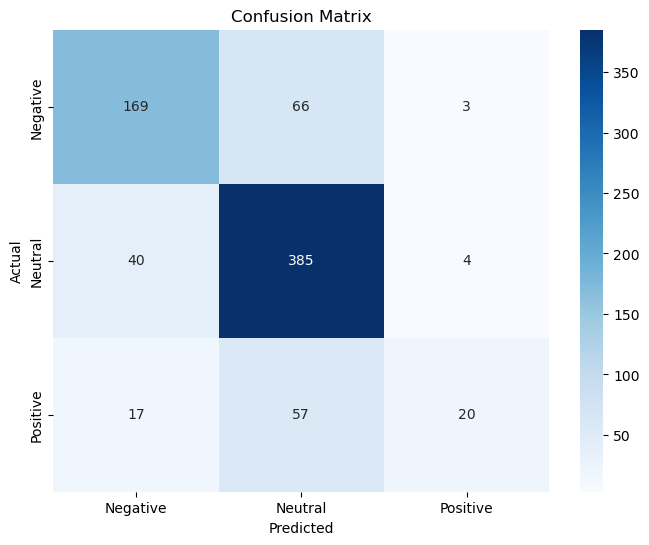

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create a confusion matrix
conf_matrix = confusion_matrix(test_labels, predictions)

# Plot the confusion matrix using seaborn and matplotlib
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Neutral', 'Positive'], 
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [11]:
def analyze_sentiment(input_text):
    # Preprocess the input text
    input_text = input_text.lower()

    # Transform the input text using the same TF-IDF vectorizer
    input_tfidf = tfidf_vectorizer.transform([input_text])

    # Predict the sentiment for the input text
    predicted_sentiment = model.predict(input_tfidf)[0]

    return predicted_sentiment

In [20]:
analyze_sentiment("I love apple stock")

'5'